In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import loadmat
from scipy import signal

## Разбирались с sampled.mat

In [2]:
import scipy.signal as sg

In [3]:
import pandas as pd

In [5]:
datapath = 'epochs/epochs/sampled.mat'

data = loadmat(datapath)
display(list(data.keys()))
display(data)

['__header__', '__version__', '__globals__', 'eeg', 'targets', 'fs']

{'__header__': b'MATLAB 5.0 MAT-file Platform: nt, Created on: Wed Oct 15 21:28:27 2025',
 '__version__': '1.0',
 '__globals__': [],
 'eeg': array([[ -8.46139145, -11.47716141, -10.9540863 , ...,   0.55661196,
          -5.76211929,  -1.2946198 ],
        [ -7.31197977,  -9.7257309 , -10.01361847, ...,   1.33936954,
          -3.13106585,   1.15592372],
        [ -6.09757662,  -7.66134977,  -9.09667778, ...,   1.20489049,
          -0.97640002,   2.523911  ],
        ...,
        [  2.74060965,  -0.30591506,  -0.75692648, ...,   0.90012372,
           2.55058289,   3.11344767],
        [  3.5415957 ,   0.73778164,   0.14410195, ...,   1.17735457,
          -2.46769166,   1.65385234],
        [  2.54462743,   0.32443467,  -0.45975858, ...,   0.45087186,
          -6.8040185 ,  -0.30879501]], shape=(59702, 8)),
 'targets': array(['T   ', 'T   ', 'T   ', ..., 'None', 'None', 'None'],
       shape=(59702,), dtype='<U4'),
 'fs': array([[250]], dtype=int32)}

In [8]:
data['fs'][0][0]

np.int32(250)

In [14]:
print(data['targets'])

['T   ' 'T   ' 'T   ' ... 'None' 'None' 'None']


In [16]:
print(data['eeg'].shape)

(59702, 8)


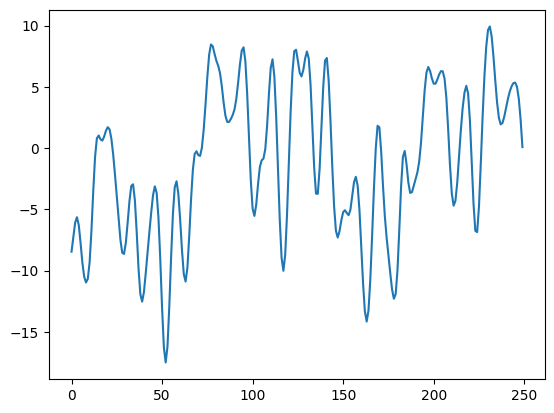

In [29]:
plt.plot(data['eeg'][:,0][0:250])

[  0.         1.953125   3.90625    5.859375   7.8125     9.765625
  11.71875   13.671875  15.625     17.578125  19.53125   21.484375
  23.4375    25.390625  27.34375   29.296875  31.25      33.203125
  35.15625   37.109375  39.0625    41.015625  42.96875   44.921875
  46.875     48.828125  50.78125   52.734375  54.6875    56.640625
  58.59375   60.546875  62.5       64.453125  66.40625   68.359375
  70.3125    72.265625  74.21875   76.171875  78.125     80.078125
  82.03125   83.984375  85.9375    87.890625  89.84375   91.796875
  93.75      95.703125  97.65625   99.609375 101.5625   103.515625
 105.46875  107.421875 109.375    111.328125 113.28125  115.234375
 117.1875   119.140625 121.09375  123.046875 125.      ]
532
(65, 532)


Text(0.5, 1.0, 'EEG raw')

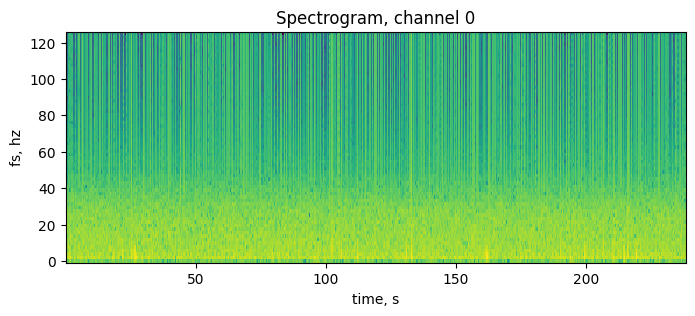

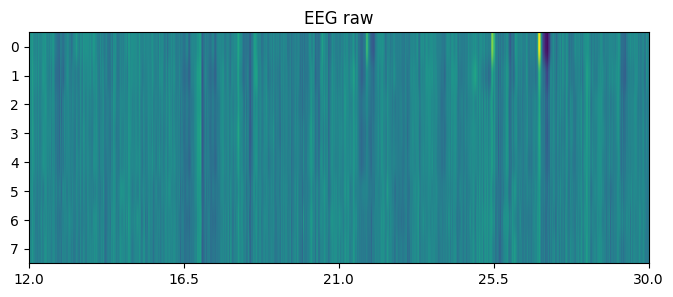

In [28]:
ch = 0

f,t,sxx = sg.spectrogram(data['eeg'][:,ch], fs=data['fs'][0][0], nperseg=128, axis=0)

print(f)
print(len(t))
print(sxx.shape)

plt.figure(figsize=(8,3))
ch = 0
plt.pcolormesh(t,f,np.log(sxx[:,:]))
plt.title(f'Spectrogram, channel {ch}')
plt.xlabel('time, s')
plt.ylabel('fs, hz')


t1 = 3000
t2 = 7500

plt.figure(figsize=(8,3))
plt.imshow(data['eeg'][t1:t2,:].T, aspect='auto')
plt.xticks(np.linspace(0,len(data['eeg'][t1:t2,:]), 5), np.linspace((t1/data['fs'][0][0]),t2/data['fs'][0][0], 5))
plt.title(f'EEG raw')

## Epochs_S_num - что тут?

In [118]:
datapath = 'epochs/epochs/epochs_S08.mat'

data = loadmat(datapath)
display(list(data.keys()))
display(data)

['__header__',
 '__version__',
 '__globals__',
 'tar_eeg',
 'tar_letters',
 'nontar_eeg',
 'nontar_letters']

{'__header__': b'MATLAB 5.0 MAT-file Platform: nt, Created on: Tue Oct 14 22:21:04 2025',
 '__version__': '1.0',
 '__globals__': [],
 'tar_eeg': array([[[ 13.10298729,  12.11608505,  13.50579453, ...,  12.78371334,
            7.03468132,   7.64228725],
         [ 13.82560825,  12.96504307,  14.82270813, ...,  13.989954  ,
            9.47614002,   8.92442322],
         [ 15.01159954,  14.29677582,  16.08406639, ...,  15.07401753,
           12.10329437,  10.33911514],
         ...,
         [  7.86381054,   0.23803127,  -8.2968359 , ...,  -9.16062927,
           -7.2359972 , -10.17528534],
         [  8.10963345,   0.71913034,  -6.66948605, ...,  -7.77548838,
           -6.94485569,  -8.56544304],
         [  9.2986784 ,   2.96717954,  -3.69442892, ...,  -5.01583004,
           -5.30369663,  -6.08196402]],
 
        [[ -8.75138378,  -7.14247704,  -3.61265016, ...,  -1.89333189,
          -10.41553879,  -6.73986578],
         [-11.04412937,  -8.17166615,  -3.83646965, ...,  -2.54248071

In [119]:
data['tar_eeg'].shape

(699, 250, 8)

In [120]:
data['tar_letters']

array(['T', 'T', 'T', 'T', 'T', 'T', 'T', 'T', 'T', 'T', 'T', 'T', 'T',
       'T', 'T', 'T', 'T', 'T', 'T', 'T', 'O', 'O', 'O', 'O', 'O', 'O',
       'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O',
       'O', 'K', 'K', 'K', 'K', 'K', 'K', 'K', 'K', 'K', 'K', 'K', 'K',
       'K', 'K', 'K', 'K', 'K', 'K', 'K', 'K', 'E', 'E', 'E', 'E', 'E',
       'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E',
       'E', 'E', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N',
       'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'M', 'M', 'M', 'M',
       'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M',
       'M', 'M', 'M', 'I', 'I', 'I', 'I', 'I', 'I', 'I', 'I', 'I', 'I',
       'I', 'I', 'I', 'I', 'I', 'I', 'I', 'I', 'I', 'I', 'R', 'R', 'R',
       'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R',
       'R', 'R', 'R', 'R', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A',
       'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'R

In [121]:
data['tar_eeg'].shape

(699, 250, 8)

In [122]:
data['nontar_eeg'].shape

(3498, 250, 8)

In [123]:
data['nontar_letters']

array(['None', 'None', 'None', ..., 'None', 'None', 'None'],
      shape=(3498,), dtype='<U4')

## Адаптация нашей нейросетевой модели к съедению данных

In [67]:
from data.data_generator import DataGenerator
from config import symbols_dict
import pandas as pd
import numpy as np
import random

import matplotlib.pyplot as plt

In [75]:
tar_dict = {'A': 1,
 'C': 2,
 'E': 3,
 'G': 4,
 'I': 5,
 'J': 6,
 'K': 7,
 'M': 8,
 'N': 9,
 'O': 10,
 'Q': 11,
 'R': 12,
 'S': 13,
 'T': 14,
 'U': 15,
 'Y': 16,
 'None': 0}

In [76]:
DG = DataGenerator(symbols_dict=symbols_dict, n_trials=20, n_letters=35, n_ch=8)

In [77]:
data, target = DG.generate()

KeyError: 0

In [73]:
data.shape

(100, 8, 400)

In [ ]:
data.reshape()

In [ ]:
dataset = EEGDataset(data, target, augment=True)

In [74]:
20*35

700